In [1]:
import tensorflow.compat.v1 as tf
from sklearn.metrics import confusion_matrix
import numpy as np
from scipy.io import loadmat
import os
from pywt import wavedec
from functools import reduce
from scipy import signal
from scipy.stats import entropy
from scipy.fft import fft, ifft
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow import keras as K
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
import scipy
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_validate
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout,Conv1D, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt;
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.decomposition import PCA
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
import xgboost as xgb
import sklearn.svm as svm 
import sklearn.naive_bayes as naive_bayes
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
input_data = pd.read_csv("/kaggle/input/time-series-repeat/Final_inputs_2.csv")
output_data = pd.read_csv("/kaggle/input/time-series-data/Final_outputs_2.csv")

In [3]:
input_data

,img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,...,img28,img29,img30,img31,img32,img33,img34,img35,img36,img37
0,0.111643,0.940038,0.964187,2.309274,-1.109878,-2.476828,0.113668,-1.160902,0.032550,0.965343,...,0.430604,0.242937,0.074334,-1.382336,0.060923,0.111643,0.940038,0.964187,2.309274,-1.109878
1,-0.299138,-0.692673,0.288300,-0.046446,-1.203138,0.169144,-0.697981,0.991973,-0.046535,0.459212,...,-1.126579,-0.299138,-0.692673,0.288300,-0.046446,-1.203138,0.169144,-0.697981,0.991973,-0.046535
2,-2.230861,0.445551,1.583041,0.926919,0.302206,-1.869937,1.526953,-2.230861,0.445551,1.583041,...,1.526953,-2.230861,0.445551,1.583041,0.926919,0.302206,-1.869937,1.526953,-2.230861,0.445551
3,-2.380272,-3.710303,2.863677,-0.218977,-0.823047,1.197829,-0.519877,-0.073044,-1.137473,-0.638890,...,1.541942,-0.032236,-0.739152,1.117301,-0.375303,-2.380272,-3.710303,2.863677,-0.218977,-0.823047
4,0.304581,1.143111,0.932990,2.370352,1.251088,2.857334,0.858400,-0.502346,0.151054,-0.865495,...,-1.538741,0.304581,1.143111,0.932990,2.370352,1.251088,2.857334,0.858400,-0.502346,0.151054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10426,0.679498,9.112654,-0.679954,-6.810731,12.957918,-1.059112,-1.535453,-7.257602,-5.919869,-6.127099,...,9.112654,-0.679954,-6.810731,12.957918,-1.059112,-1.535453,-7.257602,-5.919869,-6.127099,-8.945055
10427,-7.731459,3.617483,-6.452710,-12.723967,0.224578,-3.900863,2.833283,2.842826,-7.731459,3.617483,...,-12.723967,0.224578,-3.900863,2.833283,2.842826,-7.731459,3.617483,-6.452710,-12.723967,0.224578
10428,5.303833,1.917820,-3.722882,-2.541360,-0.927676,0.892363,-1.241966,-0.695779,-2.349699,7.033541,...,2.441109,0.909786,3.146901,2.301819,-0.504482,5.303833,1.917820,-3.722882,-2.541360,-0.927676
10429,1.895034,8.907249,-4.404327,-0.076114,1.158168,-2.667487,-2.038600,-3.653954,-0.706323,-3.482403,...,8.907249,-4.404327,-0.076114,1.158168,-2.667487,-2.038600,-3.653954,-0.706323,-3.482403,-1.945868


In [4]:
output_data

,label
0,0
1,1
2,2
3,0
4,1
...,...
10426,1
10427,2
10428,0
10429,1


In [5]:
length = len(output_data)

In [6]:
lst = []
for i in range(length):
    if float(output_data['label'][i]) == 1:
        lst.append(i)

output_data.drop(output_data.index[lst], inplace = True)
input_data.drop(input_data.index[lst], inplace = True)

In [7]:
x = input_data.to_numpy()
y = output_data.to_numpy()

In [8]:
# for i in range(len(y)):
#     if y[i] == 1:
#         y[i] = 0
        
for i in range(len(y)):
    if y[i] == 2:
        y[i] = 1

In [9]:
x = StandardScaler().fit_transform(x)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

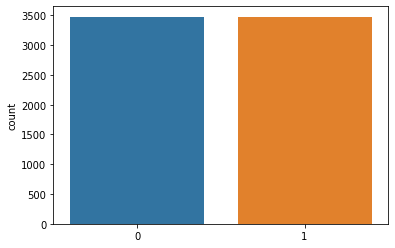

In [10]:
t = []
for i in range(len(y)):
    t.append(y[i][0])
import seaborn as sns 
sns.countplot(t)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [12]:
# pca = PCA(n_components=225)
# train_x_pca = pca.fit_transform(x_train)
# test_x_pca = pca.transform(x_test)
test_x_pca = x_test
train_x_pca = x_train

# ML Models

## 1. SVM

In [13]:
clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
clf_pca.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.5, class_weight='balanced', decision_function_shape='ovo',
    probability=True)

In [14]:
test_yhat = clf_pca.predict_proba(x_test)
# test_yhat

In [15]:
fin_lst = []
for i in test_yhat:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.6042402826855123

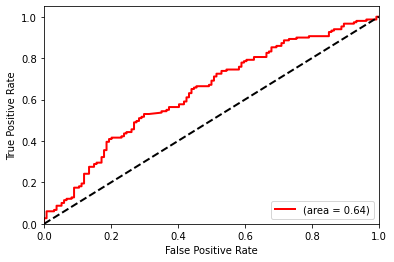

In [16]:
fpr, tpr, _ = roc_curve(y_test, test_yhat[:, -1],pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(
    fpr,
    tpr,
    color="red",
    lw=2,
    label="(area = {0:0.2f})".format(roc_auc),
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [17]:
cv = KFold(n_splits=10, shuffle=True)
# clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
scores = cross_val_score(clf_pca, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

0.643362831858407

In [18]:
confusion_matrix(y_test, fin_lst)

array([[92, 42],
       [70, 79]])

In [19]:
print(classification_report(y_test, fin_lst))

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       134
           1       0.65      0.53      0.59       149

    accuracy                           0.60       283
   macro avg       0.61      0.61      0.60       283
weighted avg       0.61      0.60      0.60       283



In [20]:
roc_auc_score(y_test, test_yhat[:,-1], average=None)

0.6358559551237104

## 2. XG Boost

In [21]:
xgbc = xgb.XGBClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1,use_label_encoder=False)
xgbc.fit(train_x_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [22]:
test_yhat = xgbc.predict_proba(test_x_pca)
# test_yhat

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [23]:
fin_lst = []
for i in test_yhat:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.6325088339222615

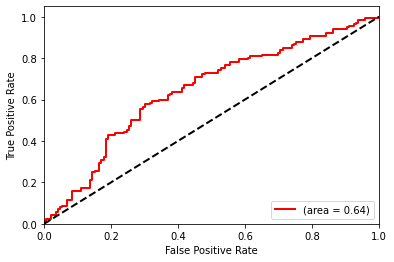

In [24]:
fpr, tpr, _ = roc_curve(y_test, test_yhat[:, -1],pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(
    fpr,
    tpr,
    color="red",
    lw=2,
    label="(area = {0:0.2f})".format(roc_auc),
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [25]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
scores = cross_val_score(xgbc, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

0.6557522123893805

In [26]:
confusion_matrix(y_test, fin_lst)

array([[98, 48],
       [56, 81]])

In [27]:
print(classification_report(y_test, fin_lst))

              precision    recall  f1-score   support

           0       0.64      0.67      0.65       146
           1       0.63      0.59      0.61       137

    accuracy                           0.63       283
   macro avg       0.63      0.63      0.63       283
weighted avg       0.63      0.63      0.63       283



In [28]:
roc_auc_score(y_test, test_yhat[:,-1], average=None)

0.6444855514448554

## 3. AdaBoost

In [29]:
clf1 = AdaBoostClassifier(n_estimators=1000, random_state=0,learning_rate = 0.1)
clf1.fit(train_x_pca, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.1, n_estimators=1000, random_state=0)

In [30]:
test_yhat = clf1.predict_proba(test_x_pca)
# test_yhat

In [31]:
fin_lst = []
for i in test_yhat:
    fin_lst.append(np.argmax(i, axis=0))
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.5300353356890459

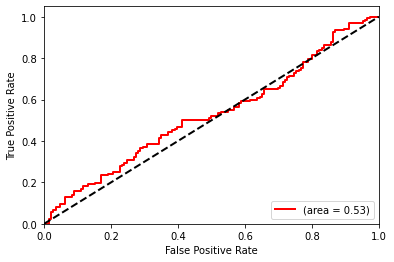

In [32]:
fpr, tpr, _ = roc_curve(y_test, test_yhat[:, -1],pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(
    fpr,
    tpr,
    color="red",
    lw=2,
    label="(area = {0:0.2f})".format(roc_auc),
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [33]:
cv = KFold(n_splits=4, random_state=1, shuffle=True)
# clf_pca = SVC(kernel = 'rbf',class_weight = "balanced",decision_function_shape='ovo',C = 1.5, probability = True,gamma = 'scale')
scores = cross_val_score(clf1, x, y, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(scores)

0.5451344510437812

In [34]:
confusion_matrix(y_test, fin_lst)

array([[81, 65],
       [68, 69]])

In [35]:
print(classification_report(y_test, fin_lst))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55       146
           1       0.51      0.50      0.51       137

    accuracy                           0.53       283
   macro avg       0.53      0.53      0.53       283
weighted avg       0.53      0.53      0.53       283



In [36]:
roc_auc_score(y_test, test_yhat[:,-1], average=None)

0.5261973802619737

# Neural Networks

In [13]:
x_train = np.array(x_train).reshape(-1,37,1)
x_test = np.array(x_test).reshape(-1,37,1)

In [14]:
inputs = tf.keras.Input(shape=(37,1))

Dense_1 = Dense(32, activation = 'relu',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  Bidirectional(LSTM(64, return_sequences = True))(Dense_1)
drop = Dropout(0.5)(lstm_1)
lstm_2=  Bidirectional(LSTM(32, return_sequences = True))(drop)
drop2 = Dropout(0.5)(lstm_2)

flat = Flatten()(drop2)

Dense_2 = Dense(64, activation = 'relu')(flat)
Dense_3 = Dense(32, activation = 'relu')(Dense_2)
outputs = Dense(1, activation='sigmoid')(Dense_3)

model = tf.keras.Model(inputs, outputs)

model.summary()

2023-02-13 09:14:27.040949: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 37, 1)]           0         
_________________________________________________________________
dense (Dense)                (None, 37, 32)            64        
_________________________________________________________________
bidirectional (Bidirectional (None, 37, 128)           49664     
_________________________________________________________________
dropout (Dropout)            (None, 37, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 37, 64)            41216     
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2368)              0     

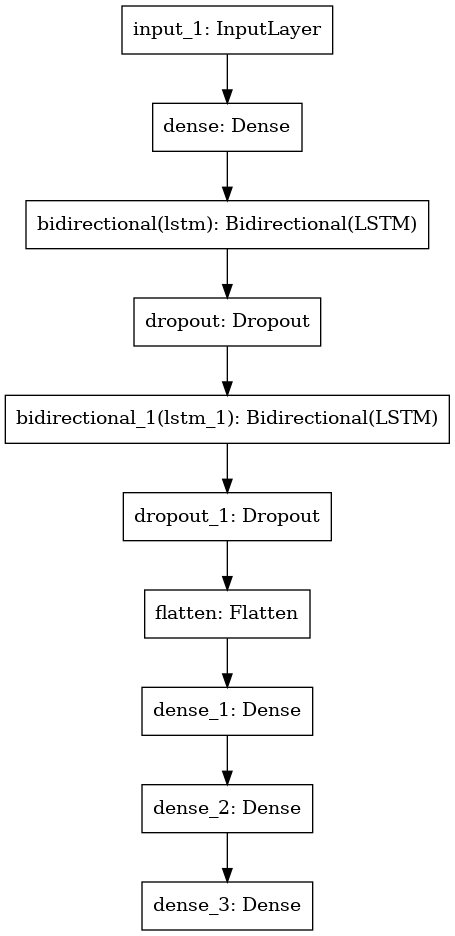

In [15]:
tf.keras.utils.plot_model(model)

In [16]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [17]:
model,history = train_model(model, x_train, y_train,x_test,y_test, save_to= './', epoch = 100) 

2023-02-13 09:14:29.544840: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
261/261 [==============================] - 36s 107ms/step - loss: 0.6441 - accuracy: 0.6215 - val_loss: 0.4662 - val_accuracy: 0.8039

Epoch 00001: val_accuracy improved from -inf to 0.80391, saving model to ./_best_model.h5
Epoch 2/100
261/261 [==============================] - 26s 100ms/step - loss: 0.1416 - accuracy: 0.9590 - val_loss: 0.0617 - val_accuracy: 0.9856

Epoch 00002: val_accuracy improved from 0.80391 to 0.98562, saving model to ./_best_model.h5
Epoch 3/100
261/261 [==============================] - 26s 100ms/step - loss: 0.0770 - accuracy: 0.9802 - val_loss: 0.0902 - val_accuracy: 0.9781

Epoch 00003: val_accuracy did not improve from 0.98562
Epoch 4/100
261/261 [==============================] - 26s 100ms/step - loss: 0.0621 - accuracy: 0.9829 - val_loss: 0.0531 - val_accuracy: 0.9891

Epoch 00004: val_accuracy improved from 0.98562 to 0.98907, saving model to ./_best_model.h5
Epoch 5/100
261/261 [==============================] - 26s 99ms/step - loss: 0.05

In [18]:
model = load_model('./_best_model.h5')

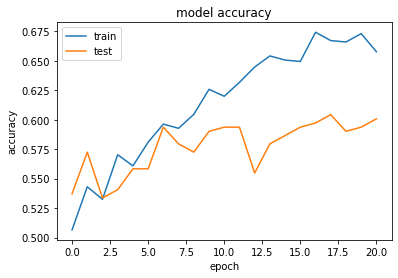

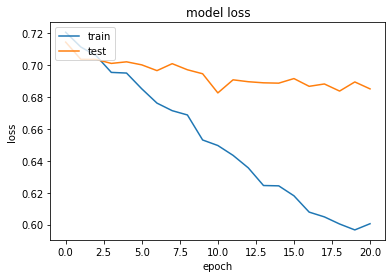

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
y_pred = model.predict(x_test)

In [45]:
fin_lst = []
for i in y_pred:
#     print(i)
    if i[0] > 0.5:
        fin_lst.append(1)
    else:
        fin_lst.append(0)
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.6042402826855123

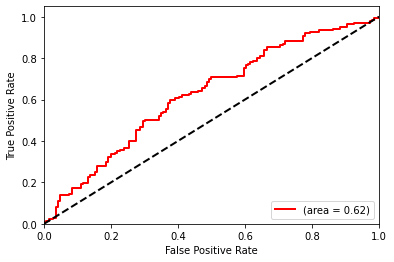

In [46]:
fpr, tpr, _ = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(
    fpr,
    tpr,
    color="red",
    lw=2,
    label="(area = {0:0.2f})".format(roc_auc),
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [47]:
confusion_matrix(y_test, fin_lst)

array([[87, 59],
       [53, 84]])

In [48]:
roc_auc_score(y_test, y_pred, average=None)

0.6240875912408759

In [49]:
print(classification_report(y_test, fin_lst))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61       146
           1       0.59      0.61      0.60       137

    accuracy                           0.60       283
   macro avg       0.60      0.60      0.60       283
weighted avg       0.60      0.60      0.60       283



In [50]:
inputs = tf.keras.Input(shape=(37,1))

Dense1 = Dense(32, activation = 'tanh',kernel_regularizer=keras.regularizers.l2())(inputs)

lstm_1=  LSTM(64, return_sequences = True)(Dense1)
drop = Dropout(0.5)(lstm_1)
lstm_2=  LSTM(32, return_sequences = True)(drop)
drop2 = Dropout(0.5)(lstm_2)

flat = Flatten()(drop2)

Dense_2 = Dense(64, activation = 'tanh')(flat)
Dense_3 = Dense(32, activation = 'relu')(Dense_2)
outputs = Dense(1, activation='sigmoid')(Dense_3)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 37, 1)]           0         
_________________________________________________________________
dense_4 (Dense)              (None, 37, 32)            64        
_________________________________________________________________
lstm_2 (LSTM)                (None, 37, 64)            24832     
_________________________________________________________________
dropout_2 (Dropout)          (None, 37, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 37, 32)            12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 37, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1184)              0   

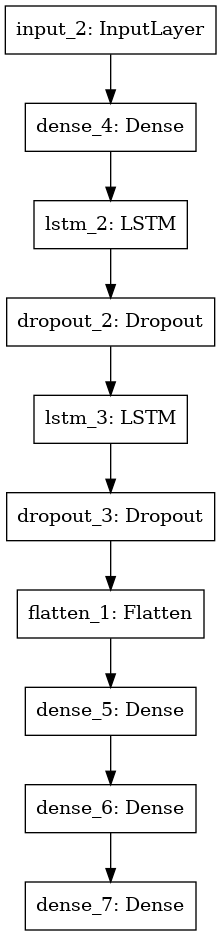

In [51]:
tf.keras.utils.plot_model(model)

In [52]:
def train_model(model,x_train, y_train,x_test,y_test, save_to, epoch = 2):

        opt_adam = keras.optimizers.Adam(learning_rate=0.001)

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
        mc = ModelCheckpoint(save_to + '_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
        lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * np.exp(-epoch / 10.))
        
        model.compile(optimizer=opt_adam,
                  loss=['binary_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=20,
                        epochs=epoch,
                        validation_data=(x_test,y_test),
                        callbacks=[es,mc,lr_schedule])
        
        saved_model = load_model(save_to + '_best_model.h5')
        
        return model,history

In [53]:
model,history = train_model(model, x_train, y_train,x_test,y_test, save_to= './', epoch = 100) 

Epoch 1/100
43/43 [==============================] - 8s 88ms/step - loss: 0.7134 - accuracy: 0.5207 - val_loss: 0.7086 - val_accuracy: 0.5265

Epoch 00001: val_accuracy improved from -inf to 0.52650, saving model to ./_best_model.h5
Epoch 2/100
43/43 [==============================] - 3s 62ms/step - loss: 0.7042 - accuracy: 0.5077 - val_loss: 0.7059 - val_accuracy: 0.5442

Epoch 00002: val_accuracy improved from 0.52650 to 0.54417, saving model to ./_best_model.h5
Epoch 3/100
43/43 [==============================] - 3s 70ms/step - loss: 0.6978 - accuracy: 0.5478 - val_loss: 0.7153 - val_accuracy: 0.5124

Epoch 00003: val_accuracy did not improve from 0.54417
Epoch 4/100
43/43 [==============================] - 3s 64ms/step - loss: 0.6948 - accuracy: 0.5490 - val_loss: 0.7149 - val_accuracy: 0.5018

Epoch 00004: val_accuracy did not improve from 0.54417
Epoch 5/100
43/43 [==============================] - 3s 68ms/step - loss: 0.6902 - accuracy: 0.5632 - val_loss: 0.7096 - val_accuracy: 

In [54]:
model = load_model('./_best_model.h5')

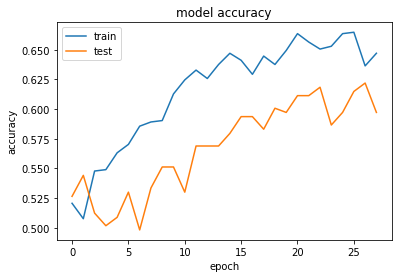

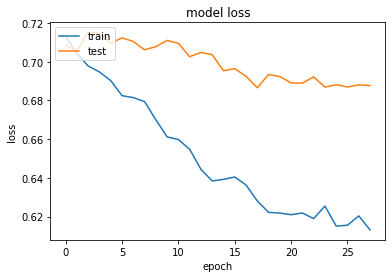

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
y_pred = model.predict(x_test)

In [57]:
fin_lst = []
for i in y_pred:
#     print(i)
    if i[0] > 0.5:
        fin_lst.append(1)
    else:
        fin_lst.append(0)
    
fin_lst = np.array(fin_lst)
fin_lst = fin_lst.reshape((-1,1))
fin_lst.shape

metrics.precision_score(y_test, fin_lst,average='micro')

0.6219081272084805

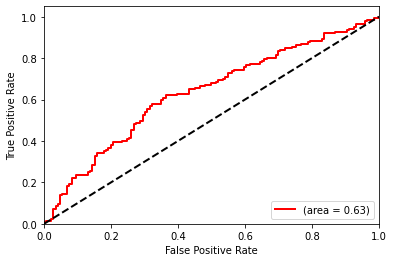

In [58]:
fpr, tpr, _ = roc_curve(y_test, y_pred,pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(
    fpr,
    tpr,
    color="red",
    lw=2,
    label="(area = {0:0.2f})".format(roc_auc),
)

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [59]:
confusion_matrix(y_test, fin_lst)

array([[91, 55],
       [52, 85]])

In [60]:
roc_auc_score(y_test, y_pred, average=None)

0.6323367663233677

In [61]:
print(classification_report(y_test, fin_lst))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       146
           1       0.61      0.62      0.61       137

    accuracy                           0.62       283
   macro avg       0.62      0.62      0.62       283
weighted avg       0.62      0.62      0.62       283



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin